<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Scotia_NLP_Phase1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install bs4
!pip install lxml

# Libraries

In [1]:
# import libraries
import re
import csv
import json
from io import StringIO 
from bs4 import BeautifulSoup
import requests
import numpy as np
from time import sleep
from random import randint
#from selenium import webdriver
import pandas as pd

from lxml import etree
import requests

All Websites list

In [43]:
url_y_conv = 'https://ca.finance.yahoo.com/quote/BNS.TO/community?p=BNS.TO'
############################################################################################################
url_wsj = 'https://www.wsj.com/search?query=bank%20of%20nova%20scotia&mod=searchresults_viewallresults'
url_wsj2 = 'https://www.wsj.com/search?query=bank%20of%20nova%20scotia' # Wall Street Journal: www.wsj.com 
############################################################################################################

url_ft = 'https://www.ft.com/search?sort=relevance&q=bank+of+nova+scotia' # Financial Times: www.ft.com 
url_gm = 'https://www.theglobeandmail.com/search/?q=%22bank%20of%20nova%20scotia%22&mode=all&S=relevant&page='	# The Globe & Mail: www.theglobeandmail.com/ 
url_bnn = 'https://www.bnnbloomberg.ca/search/bnn-search-7.337157?q=bank+of+nova+scotia' # BBN Bloomberg: https://www.bnnbloomberg.ca/
url_hetf = 'https://hamiltonetfs.com/insights-commentary/' #Hamilton ETF: Equity Research on Canadian Banking
url_mf = 'https://www.fool.ca/' #The Motley Fool: Canadian version of website
url_sa =  'https://seekingalpha.com/' #Seeking Alpha: Aggregates financial news and analysis 
url_sa2 = 'https://seekingalpha.com/symbol/BNS?source%3Dcontent_type%253Areact%257Csource%253Asearch' #(BNS Stock Page)

content_list = []
# To view full text in pandas dataset
pd.set_option('display.max_colwidth', None)

# **Scraping Yahoo *Finance*** Option 1

### **Yahoo *Finance*** reactions on $BNS.TO conversation

In [40]:
results1 = requests.get(url_y_conv)
web_content1 = BeautifulSoup(results1.text, 'lxml',)
search_content1 = web_content1.find('div',{"id":'Main'}).text # We search for the user comments based on Top Reactions and extract text only.

print(search_content1)

879 reactions on $BNS.TO conversationSign in to post a message.Top ReactionsaalanOnly ones happy are those who brought Bank stock within the past year... Canadian banks’ pe are getting higher than historical. Rotating that cash over to beat down tech now..ReplyReplies (2)1JJohnNot sure about Bank of America, but this bank is pretty good. It pays .90 per share and the growth is steadily going up. I notice it goes up about $20 every 3 months. CIBC pays $1.46 per share and I own both.ReplyReplies (4)52ttomAll Canadian Banks are sitting on tons of cash from PCL’s which didn’t transpire. That means big buybacks and dividend increases on the way ( once approved by regulators ) in saying that all banks CET1 ratios are well above the min level. Big 5 banks are 12.5-14 range. This will not get cheaper to buy later this year. Plus net interest margins improving which is great for banks. Add if you can.ReplyNNasirBought Bns 3 years ago at 81 cn should I sell it and buy Td I am 73ReplyReplies (8)3

In [45]:
results1 = requests.get(url_y_conv)

web_content1 = BeautifulSoup(results1.content, 'html.parser')
search_content1 = web_content1.select("div > div.Wow\(bw\) > div")
for com in search_content1:
  content_list.append(com)
  print(*com,sep="\n")

 react-text: 35 
Only ones happy are those who brought Bank stock within the past year... Canadian banks’ pe are getting higher than historical. Rotating that cash over to beat down tech now..
 /react-text 
 react-text: 63 
Not sure about Bank of America, but this bank is pretty good. It pays .90 per share and the growth is steadily going up. I notice it goes up about $20 every 3 months. CIBC pays $1.46 per share and I own both.
 /react-text 
 react-text: 92 
All Canadian Banks are sitting on tons of cash from PCL’s which didn’t transpire. That means big buybacks and dividend increases on the way ( once approved by regulators ) in saying that all banks CET1 ratios are well above the min level. Big 5 banks are 12.5-14 range. This will not get cheaper to buy later this year. Plus net interest margins improving which is great for banks. Add if you can.
 /react-text 
 react-text: 118 
Bought Bns 3 years ago at 81 cn should I sell it and buy Td 
 /react-text 
<br data-reactid="119"/>
 react

### **Wall Street Journal**

In [36]:
results4 = requests.get('https://www.wsj.com/search?query=scotiabank')
search_content4 = []
web_content4 = BeautifulSoup(results4.content, "html.parser")

dom = etree.HTML(str(web_content4))
print(dom.xpath('//*[@class="WSJTheme--search-result--2NFlrTX7 "]'))

#search_content4 = web_content4.find('article').text
#print(search_content4)

[]


### **Financial Times**

In [47]:
results3 = requests.get(url_ft)
web_content3 = BeautifulSoup(results3.content, 'lxml')
search_content3 = web_content3.select('div > div > div > div.o-teaser__content')
for x in search_content3:
  x.select('span')
  content_list.append(x.text)
content_list[:8]

[<div class="C($c-fuji-grey-l) Mb(2px) Fz(14px) Lh(20px) Pend(8px)" data-reactid="34"><!-- react-text: 35 -->Only ones happy are those who brought Bank stock within the past year... Canadian banks’ pe are getting higher than historical. Rotating that cash over to beat down tech now..<!-- /react-text --></div>,
 <div class="C($c-fuji-grey-l) Mb(2px) Fz(14px) Lh(20px) Pend(8px)" data-reactid="62"><!-- react-text: 63 -->Not sure about Bank of America, but this bank is pretty good. It pays .90 per share and the growth is steadily going up. I notice it goes up about $20 every 3 months. CIBC pays $1.46 per share and I own both.<!-- /react-text --></div>,
 <div class="C($c-fuji-grey-l) Mb(2px) Fz(14px) Lh(20px) Pend(8px)" data-reactid="91"><!-- react-text: 92 -->All Canadian Banks are sitting on tons of cash from PCL’s which didn’t transpire. That means big buybacks and dividend increases on the way ( once approved by regulators ) in saying that all banks CET1 ratios are well above the min le

### **The Globe & Mail** 

In [49]:
url_gm1 = 'https://www.theglobeandmail.com/search/?q=%22bank%20of%20nova%20scotia%22&mode=all&S=relevant&page=1'
url_gm2 = 'https://www.theglobeandmail.com/search/?q=%22bank%20of%20nova%20scotia%22&mode=all&S=relevant&page=2'

results4= requests.get(url_gm1)
web_content4 = BeautifulSoup(results4.content, 'lxml')
for search_content4 in web_content4.select('#c-tabs-search__panel--all > div.c-search-results-news > div'):
  content_list.append(search_content4.find("").text)
#search_content4 = web_content4.select('#c-tabs-search__panel--all > div.c-search-results-news') # We search for the user comments based on Top Reactions and extract text only.

results5= requests.get(url_gm2)
web_content5 = BeautifulSoup(results5.content, 'lxml')
for search_content5 in web_content5.select('#c-tabs-search__panel--all > div.c-search-results-news > div'):
  content_list.append(search_content5.find("").text)


In [30]:
results4 = requests.get('https://seekingalpha.com/symbol/BNS?source%3Dcontent_type%253Areact%257Csource%253Asearch')

web_content4 = BeautifulSoup(results4.content, 'lxml')
search_content4 = web_content4.select("div > div")
print(*search_content4,sep="\n")

<div class="page-title">
<h1>To continue, please prove you are not a robot</h1>
</div>
<div class="content">
<div id="px-captcha"></div>
<p></p>
<p>
        To ensure this doesn’t happen in the future, please enable Javascript and cookies in your browser.<br/>
        Is this happening to you frequently? Please <a href="https://seekingalpha.userecho.com?source=captcha">report it on our feedback forum</a>.
      </p>
<p>
        If you have an ad-blocker enabled you may be blocked from proceeding. Please disable your ad-blocker and refresh.
      </p>
<p>Reference ID: <span id="refid"></span></p>
</div>
<div id="px-captcha"></div>


# Pre Processing

In [ ]:
processed_docs = [doc.lower().replace(".","") for doc in search_content]
processed_docs[0:10]

NameError: ignored

## Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)

#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)
print("-"*10)
#All words in the vocabulary.
print("All words in the vocabulary",tfidf.get_feature_names())
print("-"*10)

#TFIDF representation for all documents in our corpus 
print("TFIDF representation for all documents in our corpus\n",bow_rep_tfidf.toarray()) 
print("-"*10)

temp = tfidf.transform(["if a bank can make money in low interest rates"])
print("Tfidf representation for 'if a bank can make money in low interest rates':\n", temp.toarray())


# Pipeline for Sentiment Analysis


https://towardsdatascience.com/sentiment-analysis-of-social-media-with-python-45268dc8f23f

https://towardsdatascience.com/text-sentiment-analysis-in-nlp-ce6baba6d466

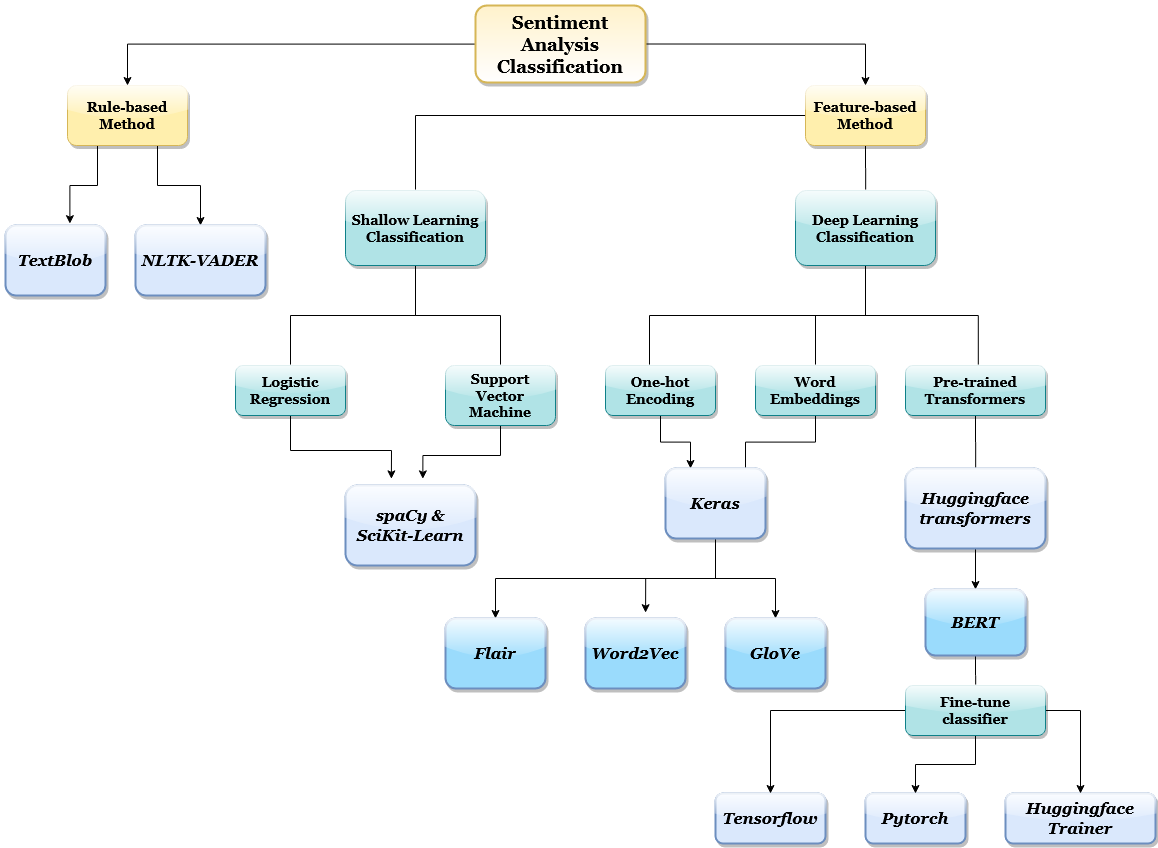